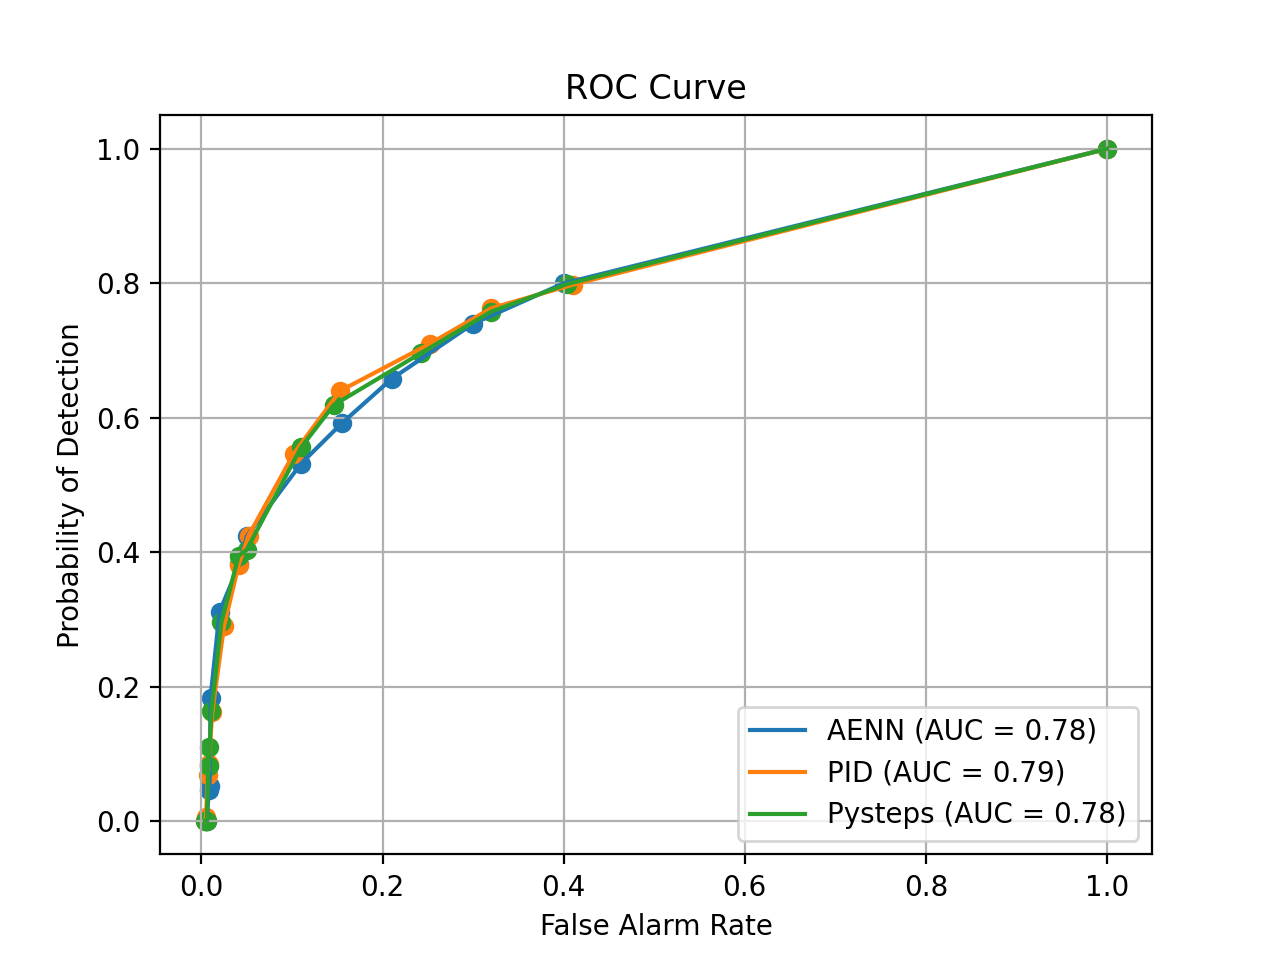

In [2]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

# Function to calculate AUC using PyTorch
def calculate_auc(y, x):
    sorted_indices = torch.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    dx = torch.diff(x, dim=0)
    y = (y[:-1] + y[1:]) / 2
    
    auc = torch.sum(dx * y)
    return auc.item()

# Load Excel sheet into a DataFrame
df = pd.read_excel('/space/ankushroy/ROC data.xlsx')  # Replace 'your_file.xlsx' with your file path

# List of model names as they appear in the Excel sheet
model_names = ['AENN', 'PID', 'Pysteps']

# Initialize the plot
plt.figure()

# Iterate through the list of models to plot ROC curve and calculate AUC
for model in model_names:
    pod = torch.tensor(df[f'{model}_POD'].values, dtype=torch.float32)
    fa = torch.tensor(df[f'{model}_FR'].values, dtype=torch.float32)
    
    auc = calculate_auc(pod, fa)
    
    plt.plot(fa, pod, label=f'{model} (AUC = {auc:.2f})')
    plt.scatter(fa, pod, marker='o')

# Customize the plot
plt.title('ROC Curve')
plt.xlabel('False Alarm Rate')
plt.ylabel('Probability of Detection')
plt.legend(loc='lower right')

plt.grid(True)
# Show the plot
plt.show()

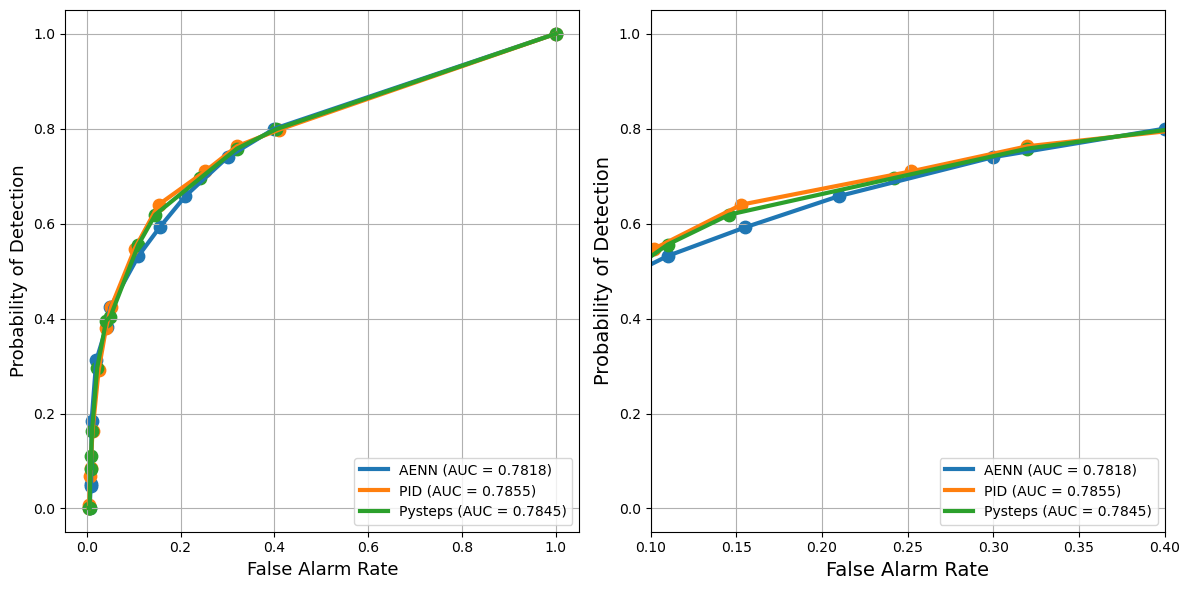

In [25]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

# Function to calculate AUC using PyTorch
def calculate_auc(y, x):
    sorted_indices = torch.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    dx = torch.diff(x, dim=0)
    y = (y[:-1] + y[1:]) / 2
    
    auc = torch.sum(dx * y)
    return auc.item()

# Load Excel sheet into a DataFrame
df = pd.read_excel('/space/ankushroy/ROC data.xlsx')  # Replace 'your_file.xlsx' with your file path



# List of model names as they appear in the Excel sheet
model_names = ['AENN', 'PID', 'Pysteps']

# Function to plot ROC curve
def plot_roc_curve(fa, pod, model, auc):
    plt.plot(fa, pod, label=f'{model} (AUC = {auc:.4f})', linewidth=3)
    plt.scatter(fa, pod, marker='o', s=80)
    
# Initialize the plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
# Full range ROC curve
for model in model_names:
    pod = torch.tensor(df[f'{model}_POD'].values, dtype=torch.float32)
    fa = torch.tensor(df[f'{model}_FR'].values, dtype=torch.float32)
    auc = calculate_auc(pod, fa)
    plot_roc_curve(fa, pod, model, auc)
#plt.title('Full Range ROC Curve')
plt.xlabel('False Alarm Rate', fontsize=14)
plt.ylabel('Probability of Detection', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
# Limited range ROC curve
for model in model_names:
    pod = torch.tensor(df[f'{model}_POD'].values, dtype=torch.float32)
    fa = torch.tensor(df[f'{model}_FR'].values, dtype=torch.float32)
    auc = calculate_auc(pod, fa)
    plot_roc_curve(fa, pod, model, auc)
#plt.title('Limited Range ROC Curve (0.1 to 0.4)')
plt.xlabel('False Alarm Rate', fontsize=14)
plt.ylabel('Probability of Detection', fontsize=14)
plt.xlim([0.1, 0.4])  # Limit x-axis to range of interest
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
pip install plotnine

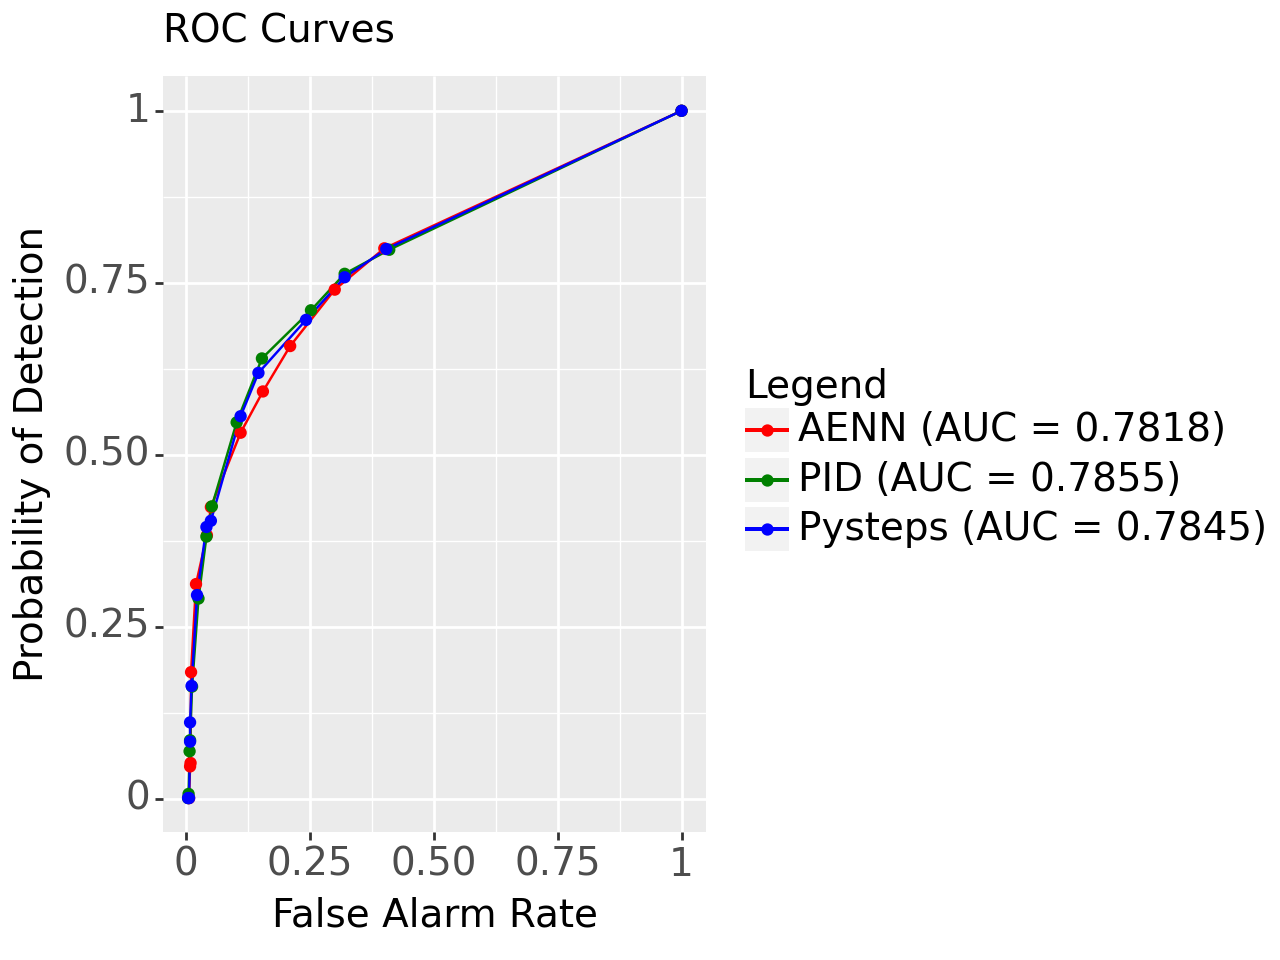

In [1]:
import pandas as pd
import torch
from plotnine import ggplot, aes, geom_line, geom_point, theme, element_text, ggtitle, xlab, ylab, labs, scale_color_manual

# Function to calculate AUC using PyTorch
def calculate_auc(y, x):
    sorted_indices = torch.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    dx = torch.diff(x, dim=0)
    y = (y[:-1] + y[1:]) / 2
    
    auc = torch.sum(dx * y)
    return auc.item()

# Load Excel sheet into a DataFrame
df = pd.read_excel('/space/ankushroy/ROC data.xlsx')  # Replace 'your_file.xlsx' with your file path

# List of model names as they appear in the Excel sheet
model_names = ['PID-GAN', 'PICM-GAN', 'Pysteps']

# Prepare data for Plotnine
all_data = []
for model in model_names:
    pod = df[f'{model}_HR'].values
    fa = df[f'{model}_FR'].values
    auc = calculate_auc(torch.tensor(pod, dtype=torch.float32), torch.tensor(fa, dtype=torch.float32))
    
    model_data = pd.DataFrame({
        'HR': pod,
        'FR': fa,
        'Model': [f"{model} (AUC = {auc:.4f})"] * len(pod)
    })
    all_data.append(model_data)

df_long = pd.concat(all_data)

# Plotting
plot = (ggplot(df_long, aes(x='FR', y='HR', color='Model', group='Model'))
        + geom_line()
        + geom_point()
        + theme(text=element_text(size=14))
        + ggtitle('ROC Curves')
        + xlab('False Alarm Rate')
        + ylab('Hit Rate')
        + labs(color='Legend')
        + scale_color_manual(values=['red', 'green', 'blue']))

print(plot)

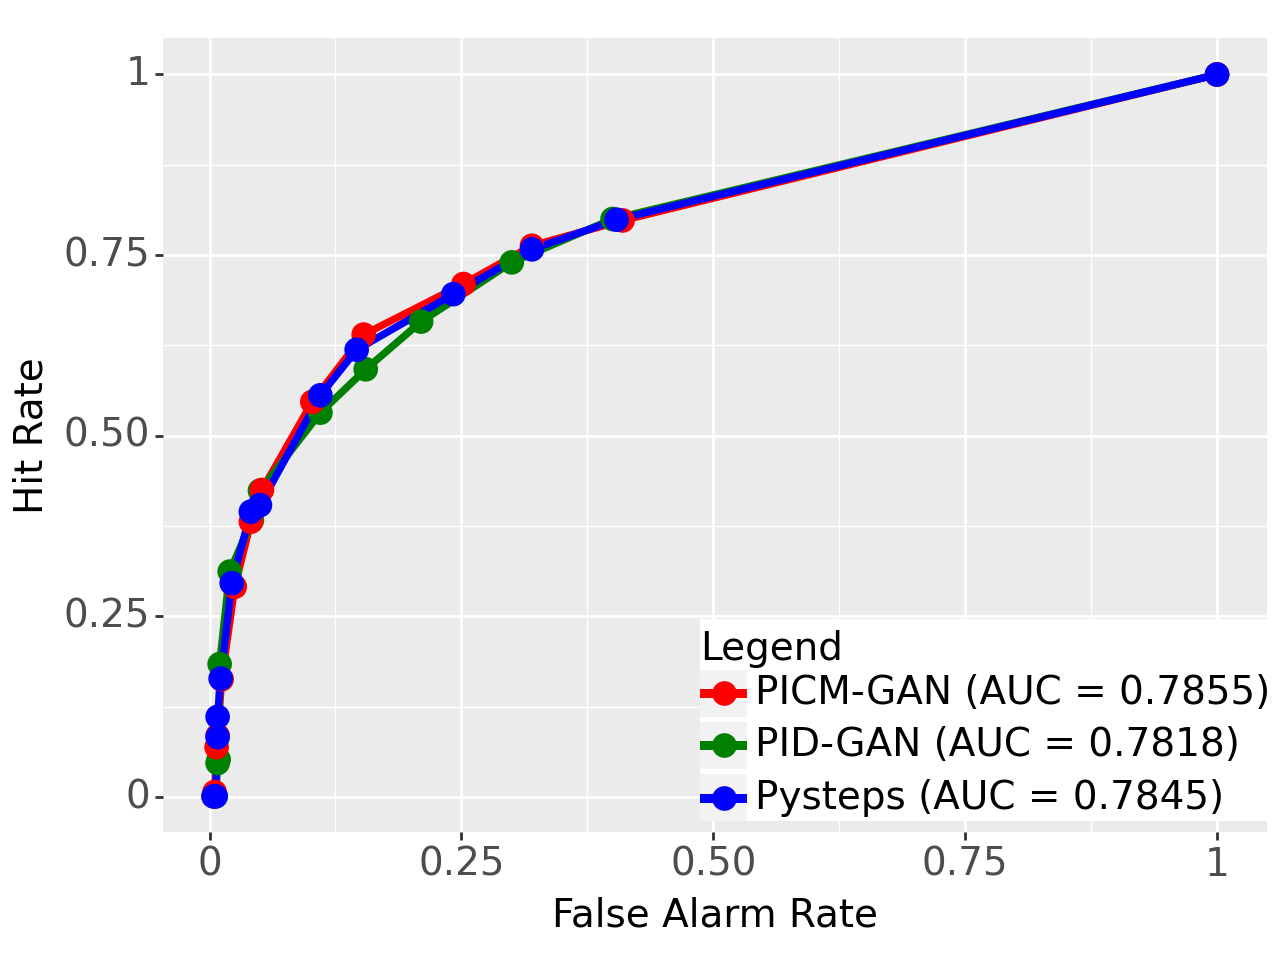

In [1]:
import pandas as pd
import torch
from plotnine import ggplot, aes, geom_line, geom_point, theme, element_text, ggtitle, xlab, ylab, labs, scale_color_manual, guides, guide_legend

# Function to calculate AUC using PyTorch
def calculate_auc(y, x):
    sorted_indices = torch.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    dx = torch.diff(x, dim=0)
    y = (y[:-1] + y[1:]) / 2
    
    auc = torch.sum(dx * y)
    return auc.item()

# Load Excel sheet into a DataFrame
df = pd.read_excel('/space/ankushroy/ROC data.xlsx')  # Replace 'your_file.xlsx' with your file path

# List of model names as they appear in the Excel sheet
model_names = ['PID-GAN', 'PICM-GAN', 'Pysteps']

# Prepare data for Plotnine
all_data = []
for model in model_names:
    pod = df[f'{model}_HR'].values
    fa = df[f'{model}_FR'].values
    auc = calculate_auc(torch.tensor(pod, dtype=torch.float32), torch.tensor(fa, dtype=torch.float32))
    
    model_data = pd.DataFrame({
        'HR': pod,
        'FR': fa,
        'Model': [f"{model} (AUC = {auc:.4f})"] * len(pod)
    })
    all_data.append(model_data)

df_long = pd.concat(all_data)

# Plotting
plot = (ggplot(df_long, aes(x='FR', y='HR', color='Model', group='Model'))
        + geom_line(size = 1.5)
        + geom_point(size = 4)
        + theme(text=element_text(size=14),
                legend_position=(0.77, 0.25))  # (x, y) coordinates to place the legend inside the plot
        
        + xlab('False Alarm Rate')
        + ylab('Hit Rate')
        + labs(color='Legend')
        + scale_color_manual(values=['red', 'green', 'blue'])
        + guides(color=guide_legend(nrow=3, byrow=True)))

print(plot)

/users/ankushroy/anaconda3/envs/myenv_exp_1/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/ankushroy/anaconda3/envs/myenv_exp_1/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: full_plot.png
/users/ankushroy/anaconda3/envs/myenv_exp_1/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/ankushroy/anaconda3/envs/myenv_exp_1/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: zoomed_plot.png


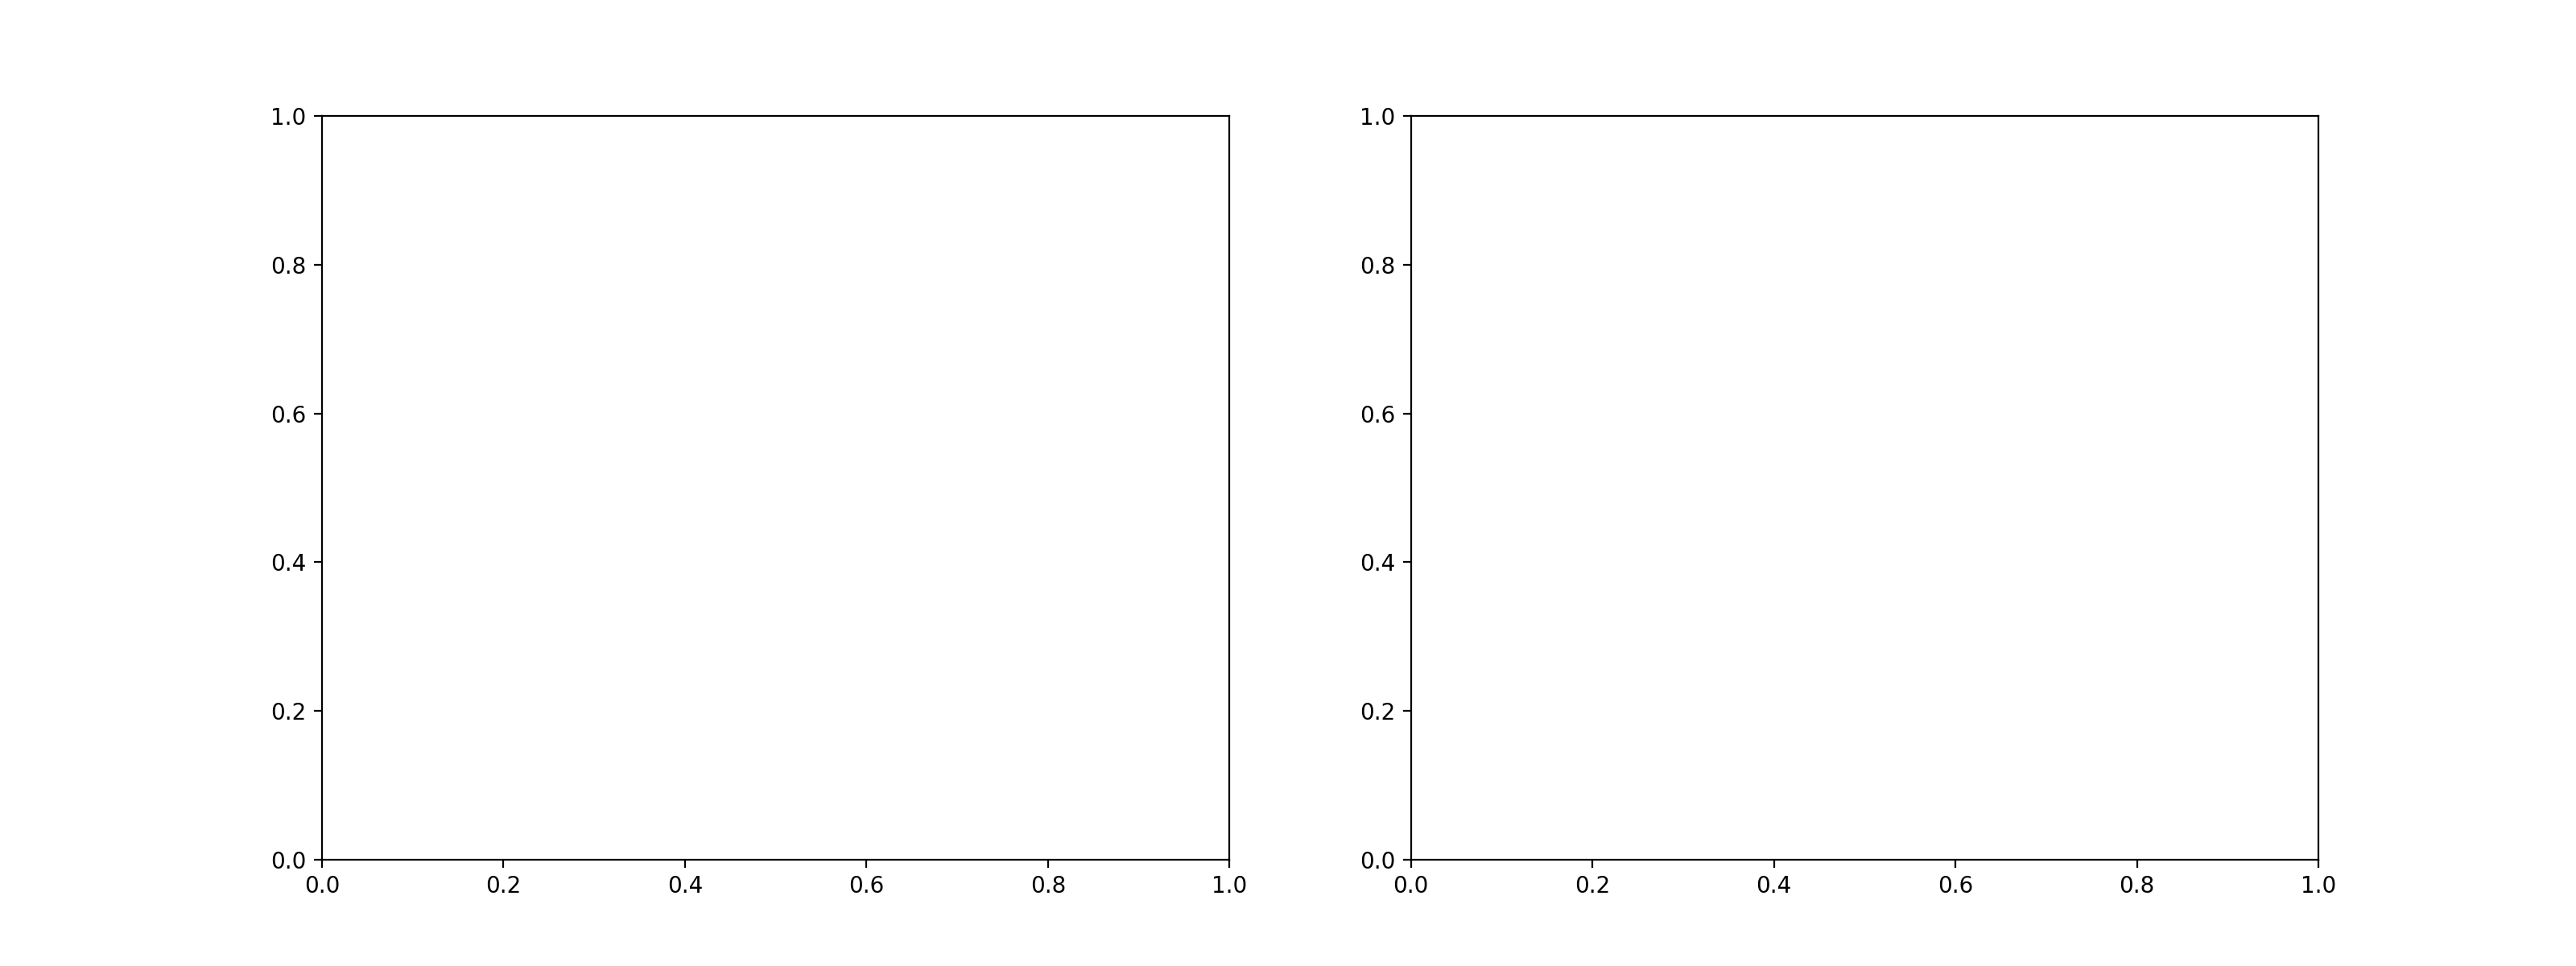

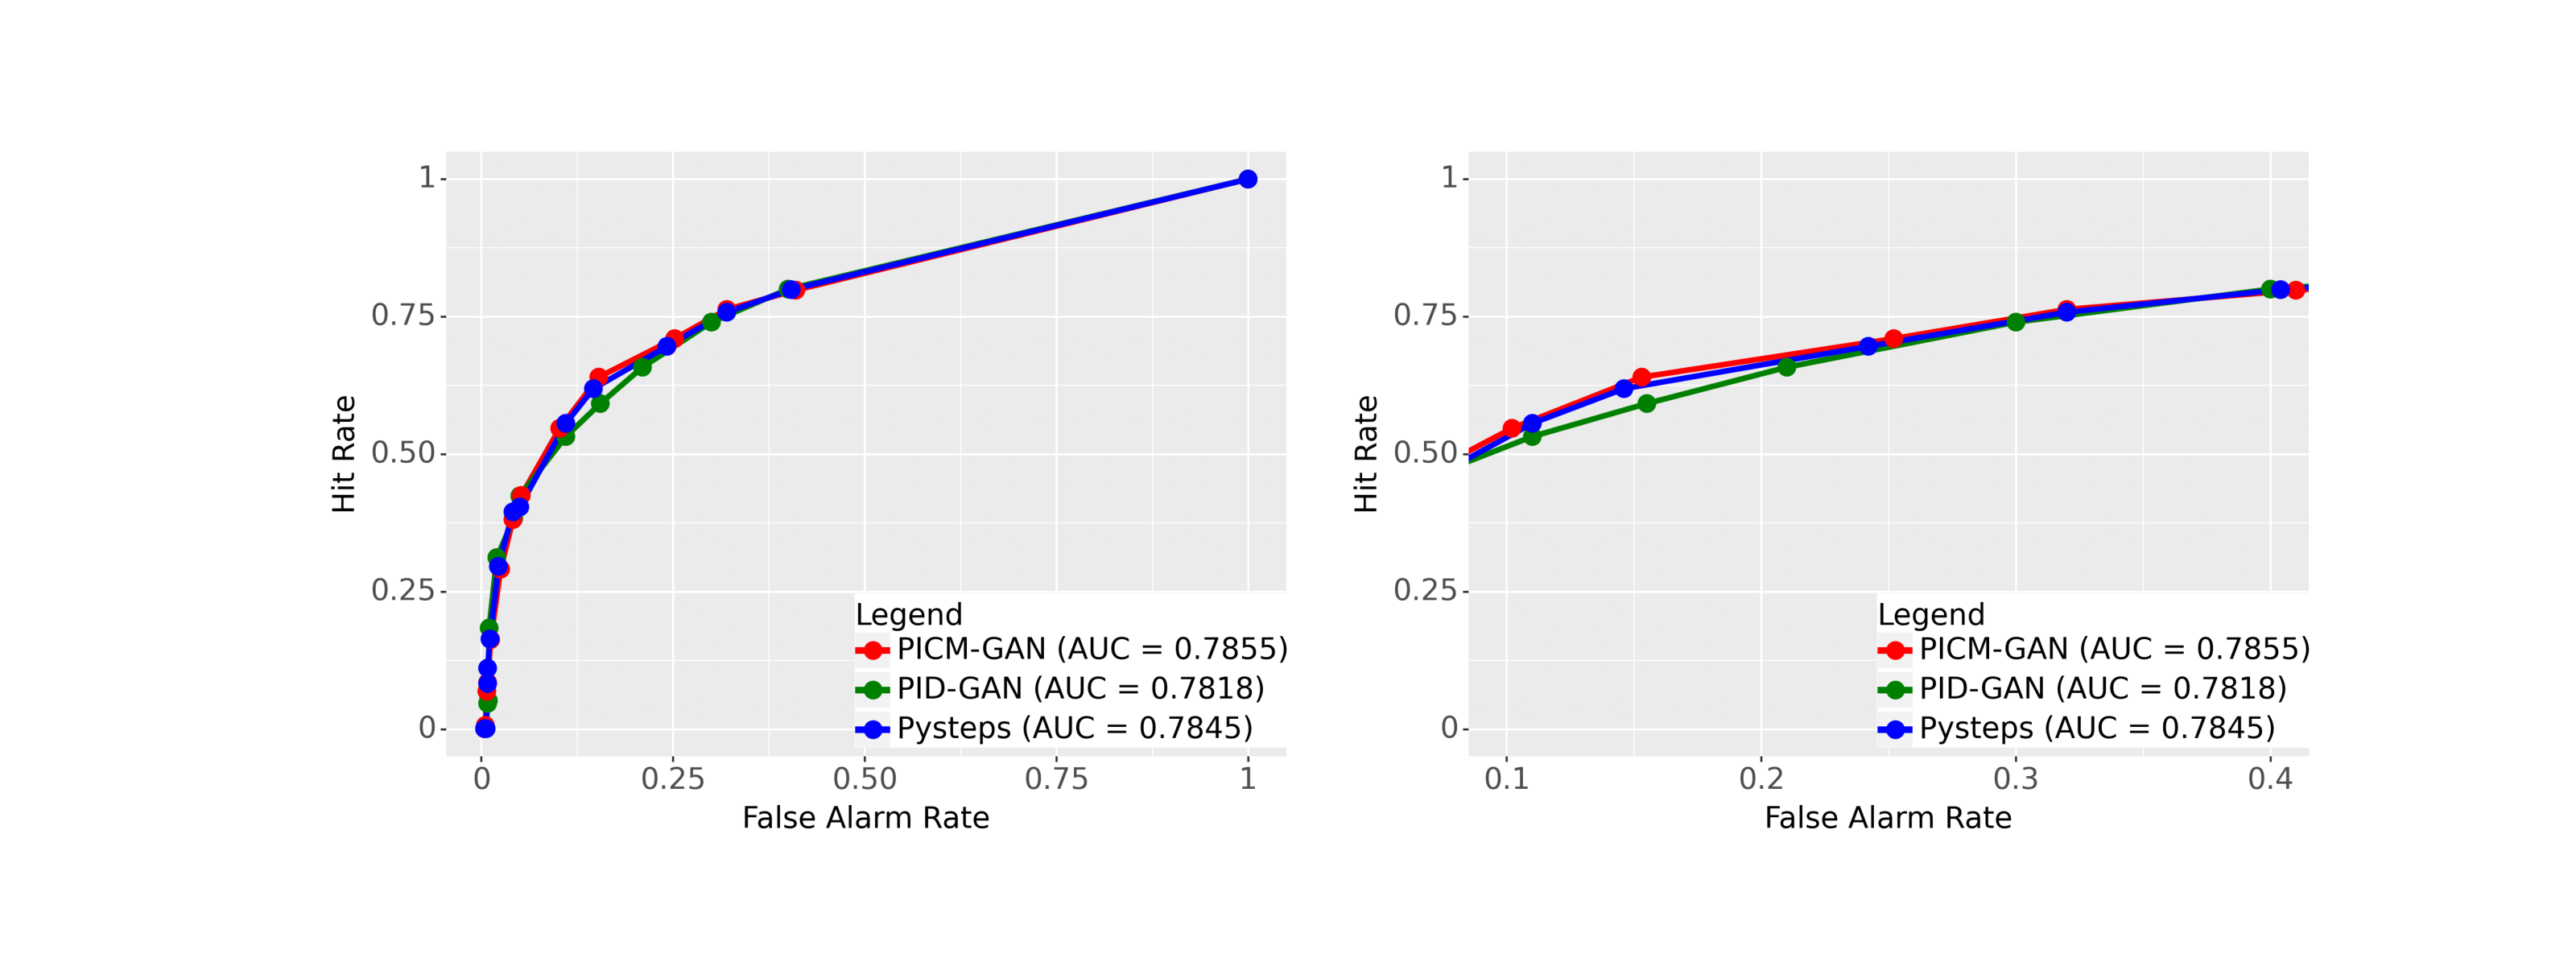

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from plotnine import ggplot, aes, geom_line, geom_point, theme, element_text, ggtitle, xlab, ylab, labs, scale_color_manual, guides, guide_legend,xlim,coord_cartesian

# Function to calculate AUC using PyTorch
def calculate_auc(y, x):
    sorted_indices = torch.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    dx = torch.diff(x, dim=0)
    y = (y[:-1] + y[1:]) / 2
    
    auc = torch.sum(dx * y)
    return auc.item()

# Load Excel sheet into a DataFrame
df = pd.read_excel('/space/ankushroy/ROC data.xlsx')  # Replace 'your_file.xlsx' with your file path
#df.rename(columns={'PID': 'PID-GAN'}, inplace=True)

# List of model names as they appear in the Excel sheet
model_names = ['PID-GAN', 'PICM-GAN', 'Pysteps']

# Prepare data for Plotnine
all_data = []
for model in model_names:
    pod = df[f'{model}_HR'].values
    fa = df[f'{model}_FR'].values
    auc = calculate_auc(torch.tensor(pod, dtype=torch.float32), torch.tensor(fa, dtype=torch.float32))
    
    model_data = pd.DataFrame({
        'HR': pod,
        'FR': fa,
        'Model': [f"{model} (AUC = {auc:.4f})"] * len(pod)
    })
    all_data.append(model_data)

df_long = pd.concat(all_data)

#df_long['FR_range'] = '0 to 1'  # original range
#df_restricted = df_long[df_long['FR'] >= 0.1]
#df_restricted = df_restricted[df_restricted['FR'] <= 0.4]
#df_restricted['FR_range'] = '0.1 to 0.4'  # restricted range

# Combine original and restricted DataFrames
#df_combined = pd.concat([df_restricted])

# Plotting
plot = (ggplot(df_long, aes(x='FR', y='HR', color='Model', group='Model'))
        + geom_line(size = 1.5)
        + geom_point(size = 4)
        + theme(text=element_text(size=14),
                legend_position=(0.77, 0.25))  # (x, y) coordinates to place the legend inside the plot
        
        + xlab('False Alarm Rate')
        + ylab('Hit Rate')
        + labs(color='Legend')
        + scale_color_manual(values=['red', 'green', 'blue'])
        + guides(color=guide_legend(nrow=3, byrow=True)))

plot_zoomed = (ggplot(df_long, aes(x='FR', y='HR', color='Model', group='Model'))
               + geom_line(size=1.5)
               + geom_point(size=4)
               + theme(text=element_text(size=14),
                legend_position=(0.77, 0.25))  # (x, y) coordinates to place the legend inside the plot
               + xlab('False Alarm Rate')
               + ylab('Hit Rate')
               + labs(color='Legend')
               + scale_color_manual(values=['red', 'green', 'blue'])
               + guides(color=guide_legend(nrow=3, byrow=True))
               + coord_cartesian(xlim=(0.1, 0.4)))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot.save("full_plot.png", dpi=300)
plot_zoomed.save("zoomed_plot.png", dpi=300)
axes[0].imshow(plt.imread("full_plot.png"))
axes[1].imshow(plt.imread("zoomed_plot.png"))
axes[0].axis('off')
axes[1].axis('off')
plt.subplots_adjust(wspace=0.05)
plt.show()

In [5]:
print(df_combined)

     POD     FR                   Model
1  0.800  0.400     AENN (AUC = 0.7818)
2  0.740  0.300     AENN (AUC = 0.7818)
3  0.658  0.210     AENN (AUC = 0.7818)
4  0.592  0.155     AENN (AUC = 0.7818)
5  0.532  0.110     AENN (AUC = 0.7818)
2  0.763  0.320      PID (AUC = 0.7855)
3  0.710  0.252      PID (AUC = 0.7855)
4  0.640  0.153      PID (AUC = 0.7855)
5  0.547  0.102      PID (AUC = 0.7855)
2  0.758  0.320  Pysteps (AUC = 0.7845)
3  0.696  0.242  Pysteps (AUC = 0.7845)
4  0.619  0.146  Pysteps (AUC = 0.7845)
5  0.556  0.110  Pysteps (AUC = 0.7845)


In [1]:
import pandas as pd
df = pd.read_excel('/space/ankushroy/Book1.xlsx')
print(df.columns)

Index(['Lead Time [min]', 'PySTEPS', 'AENN (baseline)', 'PID-GAN+MF',
       'PID-GAN+CC', 'PID-GAN+CC+MF'],
      dtype='object')


Columns in the DataFrame: Index(['Lead Time [min]', 'PySTEPS', 'AENN (baseline)', 'PID-GAN+MF',
       'PID-GAN+CC', 'PID-GAN+CC+MF'],
      dtype='object')


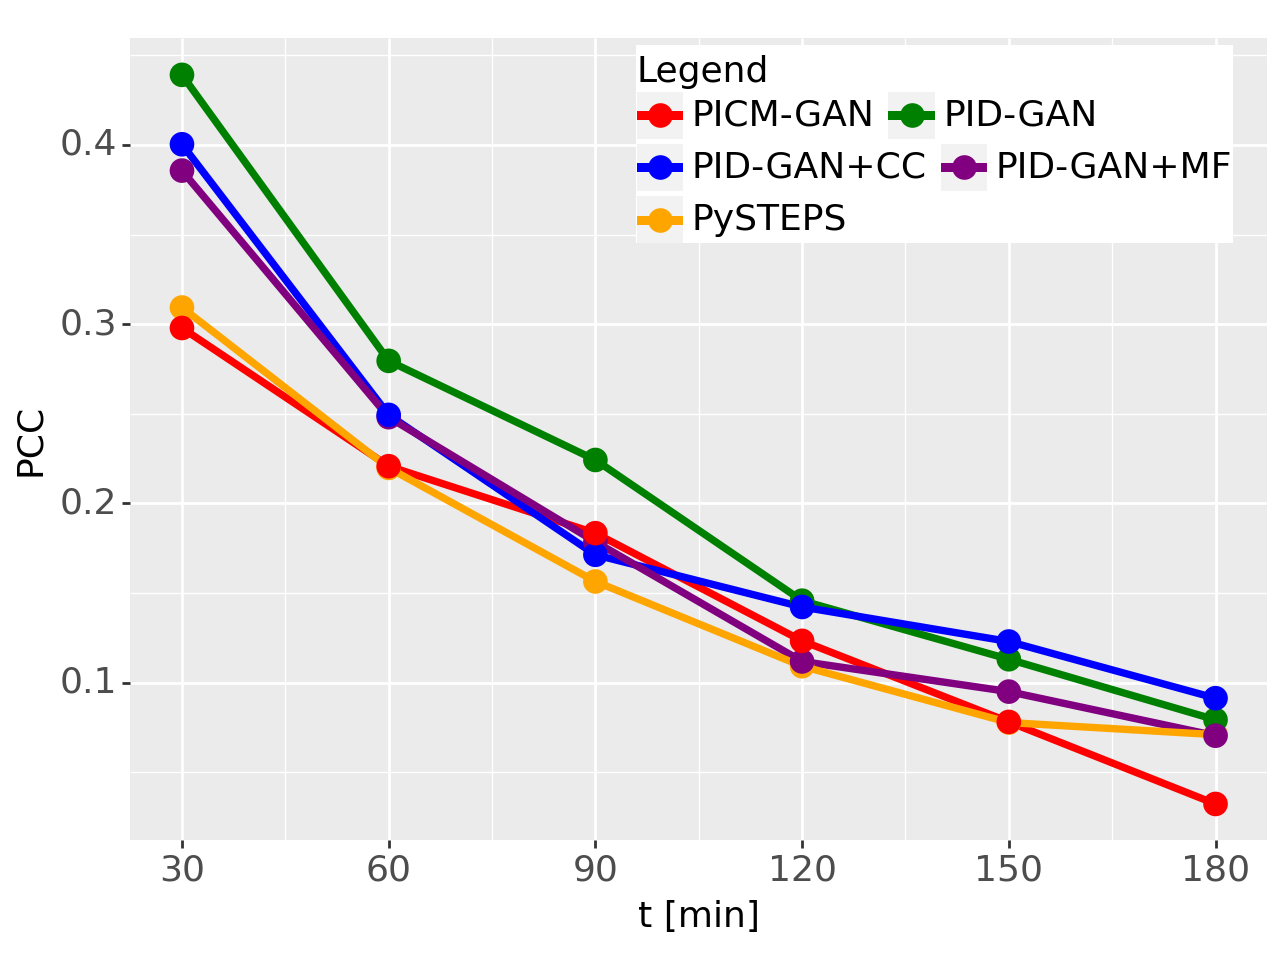

In [2]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, theme, element_text, ggtitle, xlab, ylab, labs, scale_color_manual, guides, guide_legend,xlim,coord_cartesian,scale_x_continuous

# Load the DataFrame and check its columns
df = pd.read_excel('/space/ankushroy/Book1.xlsx')
print("Columns in the DataFrame:", df.columns)

# Rename columns if necessary to remove spaces or special characters
df.rename(columns={'Lead Time [min]': 't [min]'}, inplace=True)
df.rename(columns={'AENN (baseline)': 'PID-GAN'}, inplace=True)
df.rename(columns={'PID-GAN+CC+MF': 'PICM-GAN'}, inplace=True)
# Verify DataFrame is not empty
if df.empty:
    print("DataFrame is empty. Please verify your data.")

# Melt DataFrame to long format
df_melted = pd.melt(df, id_vars=['t [min]'], var_name='Model', value_name='PCC')

# Create the plot
plot = (
    ggplot(df_melted, aes(x='t [min]', y='PCC', color='Model')) 
    + geom_line(size=1.5)
    + geom_point(size=4)
    + theme(text=element_text(size=13),
                legend_position=(0.73, 0.85))
    + labs(color='Legend')
    + scale_color_manual(values=['red', 'green', 'blue', 'purple', 'orange'])
    + guides(color=guide_legend(nrow=3, byrow=True))
    + scale_x_continuous(breaks=df['t [min]'].unique())            
    
)

# Display the plot
print(plot)

Columns in the DataFrame: Index(['Lead Time [min]', 'PySTEPS', 'AENN (baseline)', 'PID-GAN+MF',
       'PID-GAN+CC', 'PID-GAN+CC+MF'],
      dtype='object')


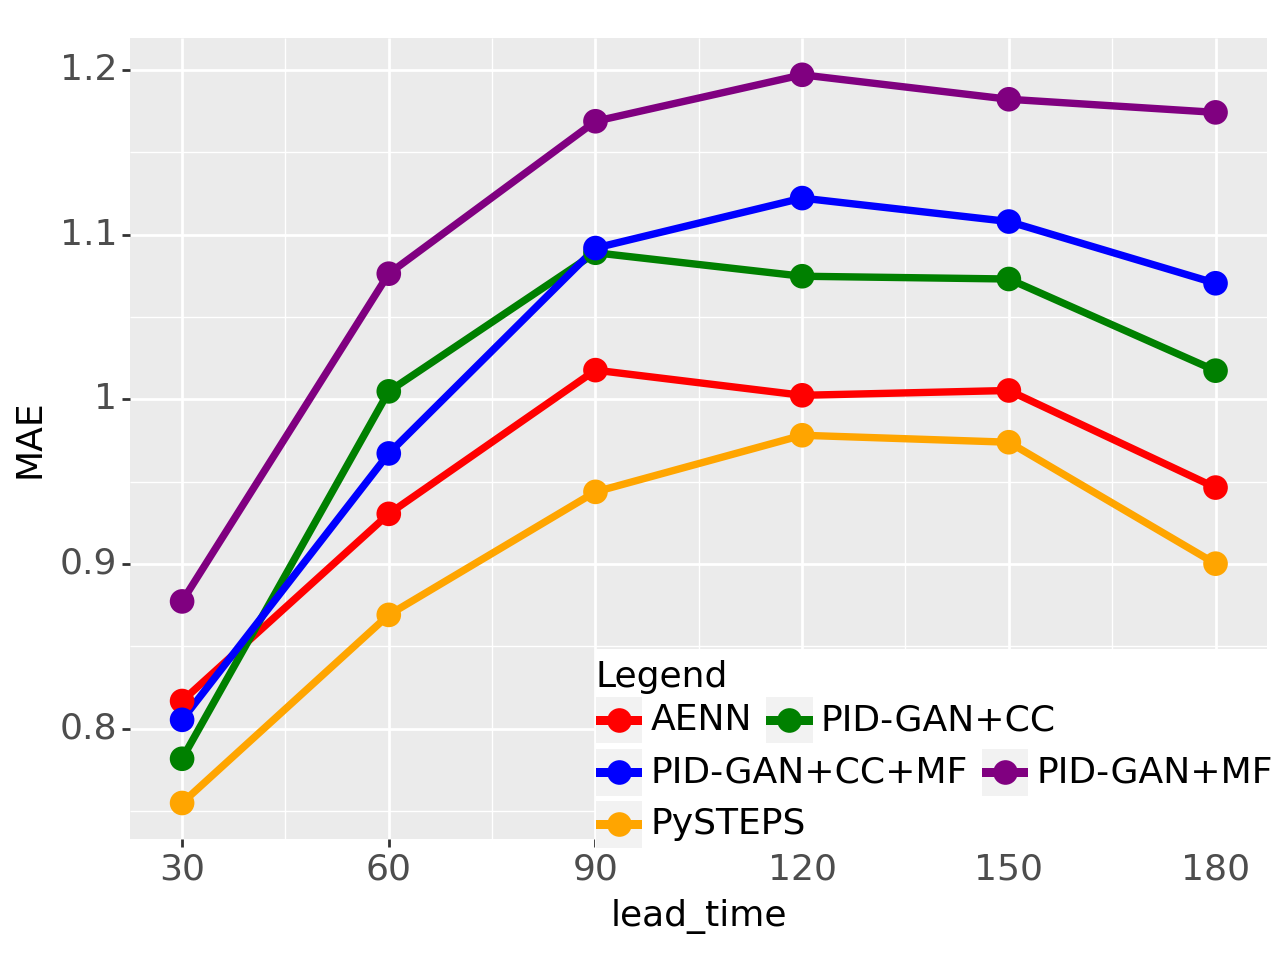

In [2]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, theme, element_text, ggtitle, xlab, ylab, labs, scale_color_manual, guides, guide_legend,xlim,coord_cartesian,scale_x_continuous

# Load the DataFrame and check its columns
df = pd.read_excel('/space/ankushroy/Book2.xlsx')
print("Columns in the DataFrame:", df.columns)

# Rename columns if necessary to remove spaces or special characters
df.rename(columns={'Lead Time [min]': 'lead_time'}, inplace=True)
df.rename(columns={'AENN (baseline)': 'AENN'}, inplace=True)
# Verify DataFrame is not empty
if df.empty:
    print("DataFrame is empty. Please verify your data.")

# Melt DataFrame to long format
df_melted = pd.melt(df, id_vars=['lead_time'], var_name='Model', value_name='MAE')

# Create the plot
plot = (
    ggplot(df_melted, aes(x='lead_time', y='MAE', color='Model')) 
    + geom_line(size=1.5)
    + geom_point(size=4)
    + theme(text=element_text(size=13),
                legend_position=(0.73, 0.22))
    + labs(color='Legend')
    + scale_color_manual(values=['red', 'green', 'blue', 'purple', 'orange'])
    + guides(color=guide_legend(nrow=3, byrow=True))
    + scale_x_continuous(breaks=df['lead_time'].unique())            
    
)

# Display the plot
print(plot)

Columns in the DataFrame: Index(['Lead Time [min]', 'PySTEPS', 'PID-GAN', 'PICM-GAN'], dtype='object')


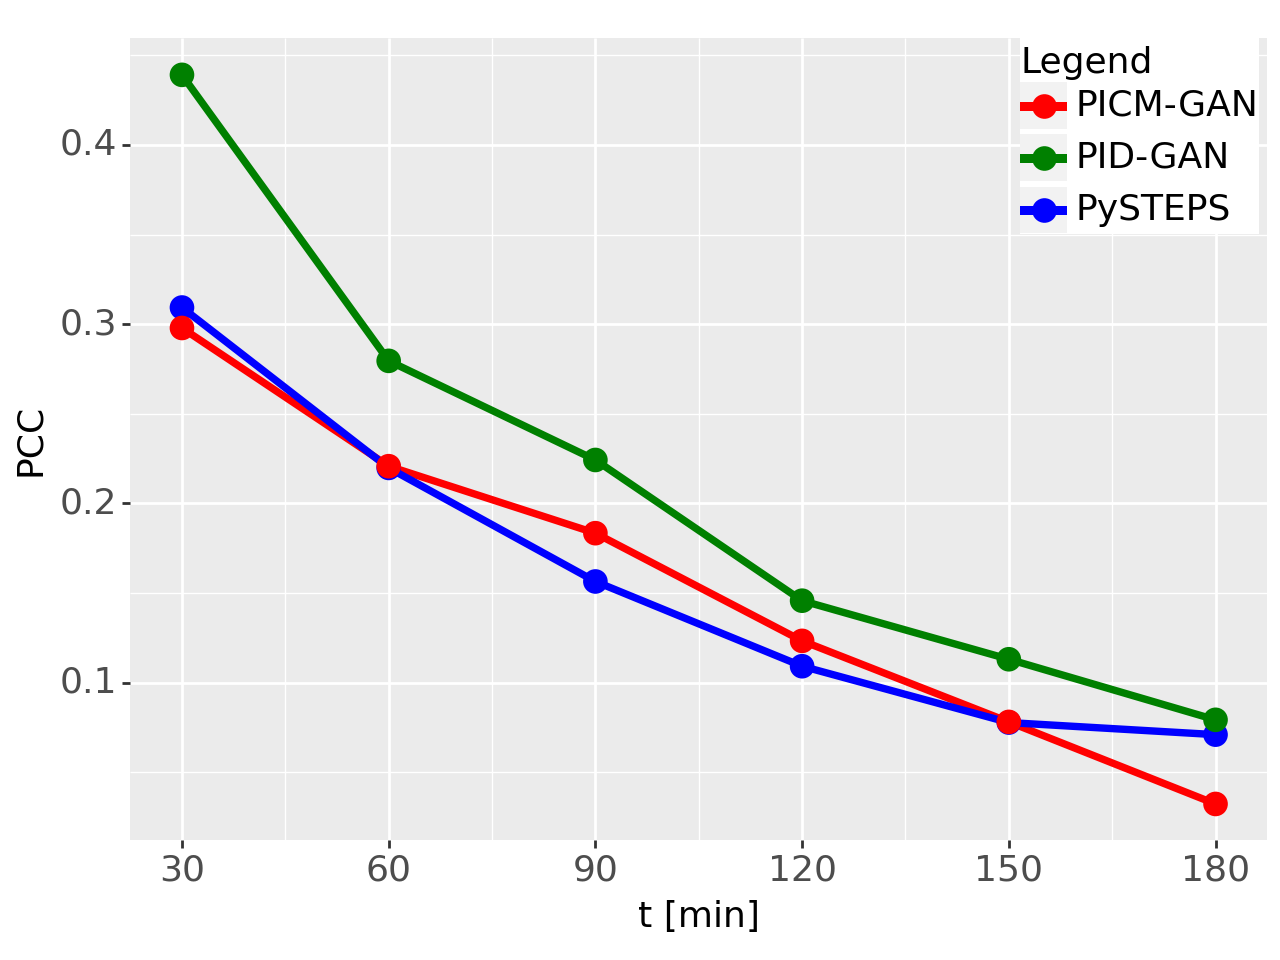

In [4]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, theme, element_text, ggtitle, xlab, ylab, labs, scale_color_manual, guides, guide_legend,xlim,coord_cartesian,scale_x_continuous

# Load the DataFrame and check its columns
df = pd.read_excel('/space/ankushroy/Book3.xlsx')
print("Columns in the DataFrame:", df.columns)

# Rename columns if necessary to remove spaces or special characters
df.rename(columns={'Lead Time [min]': 't [min]'}, inplace=True)

# Verify DataFrame is not empty
if df.empty:
    print("DataFrame is empty. Please verify your data.")

# Melt DataFrame to long format
df_melted = pd.melt(df, id_vars=['t [min]'], var_name='Model', value_name='PCC')

# Create the plot
plot = (
    ggplot(df_melted, aes(x='t [min]', y='PCC', color='Model')) 
    + geom_line(size=1.5)
    + geom_point(size=4)
    + theme(text=element_text(size=13),
                legend_position=(0.89, 0.86))
    + labs(color='Legend')
    + scale_color_manual(values=['red', 'green', 'blue', 'purple', 'orange'])
    + guides(color=guide_legend(nrow=3, byrow=True))
    + scale_x_continuous(breaks=df['t [min]'].unique())            
    
)

# Display the plot
print(plot)

Columns in the DataFrame: Index(['Lead Time [min]', 'PID-GAN', 'PID-GAN+MF', 'PID-GAN+CC', 'PICM-GAN'], dtype='object')


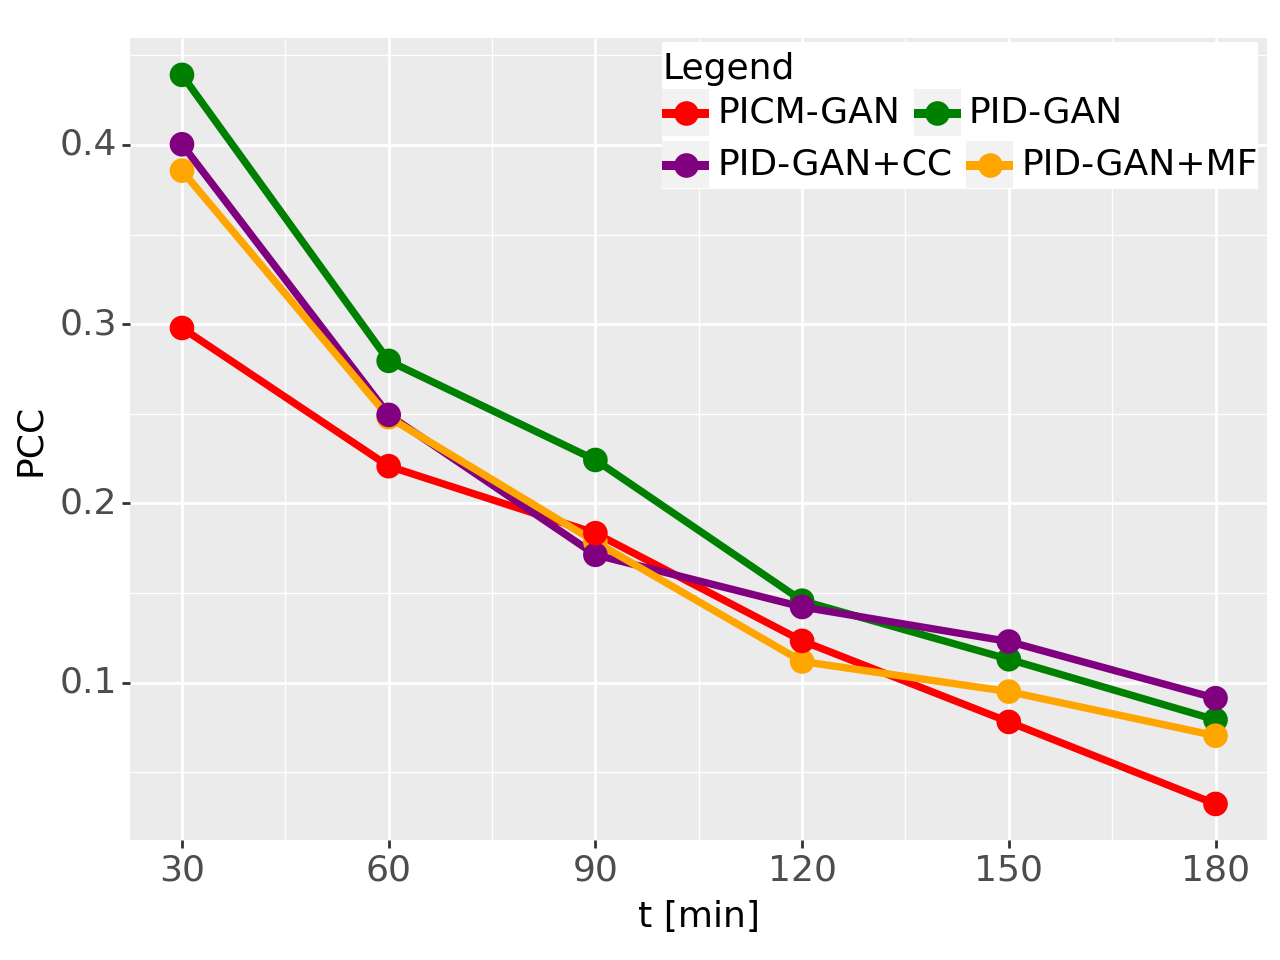

In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, theme, element_text, ggtitle, xlab, ylab, labs, scale_color_manual, guides, guide_legend,xlim,coord_cartesian,scale_x_continuous

# Load the DataFrame and check its columns
df = pd.read_excel('/space/ankushroy/Book4.xlsx')
print("Columns in the DataFrame:", df.columns)

# Rename columns if necessary to remove spaces or special characters
df.rename(columns={'Lead Time [min]': 't [min]'}, inplace=True)

# Verify DataFrame is not empty
if df.empty:
    print("DataFrame is empty. Please verify your data.")

# Melt DataFrame to long format
df_melted = pd.melt(df, id_vars=['t [min]'], var_name='Model', value_name='PCC')

# Create the plot
plot = (
    ggplot(df_melted, aes(x='t [min]', y='PCC', color='Model')) 
    + geom_line(size=1.5)
    + geom_point(size=4)
    + theme(text=element_text(size=13),
                legend_position=(0.75, 0.88))
    + labs(color='Legend')
    + scale_color_manual(values=['red', 'green', 'purple', 'orange'])
    + guides(color=guide_legend(nrow=3, byrow=True))
    + scale_x_continuous(breaks=df['t [min]'].unique())            
    
)

# Display the plot
print(plot)